this[https://www.izhikevich.org/publications/spikes.htm] is a link to an ODE model for neuronal spiking by Ichikevich.
I stress again that this is an ODE so we wont be fucked over by accidentally doing a PDE thing again.
This is basically an extention of Hodgkin-Huxley.
I've had a stab at implementing it here.

(-51.52056842250514, 4.683688038409558)

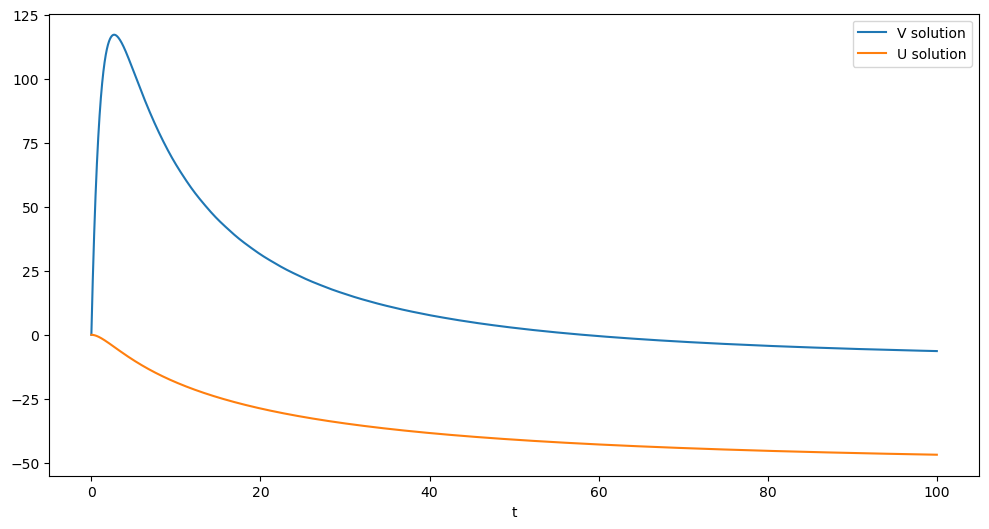

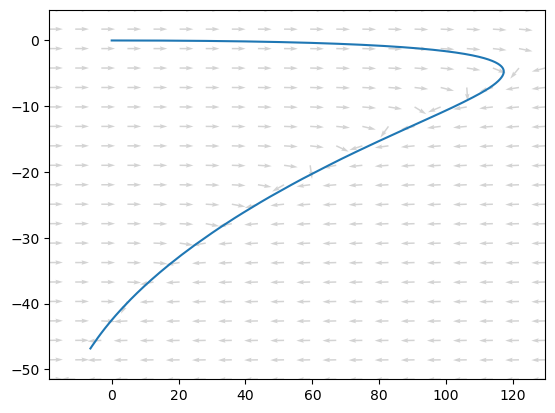

In [72]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 0.02
b = 0.2
c = -65
d = 2
I = 0 

# v is membrane potential
# u is membrane recovery variable, accounts for K+, activation, Na+ inactivation, negative 
# feedback to v


def event(t,y):
    return y[1]-30



def izhikevich(t, y, a, b, c, d, I):
    u, v = y

    #if v > 30:
    #    v = c
    #    u = u + d

    dvdt = 0.04 * v*v + 5*v + 140 - u + I
    dudt = a*(b*v - u)
    return [dvdt, dudt]

ic = [0,0]
t_span = [0, 100] 
t_eval = np.linspace(t_span[0], t_span[1], (t_span[1] - t_span[0])*1000)

params = (a,b,c,d,I)

soln = solve_ivp(izhikevich, 
                t_span,
                ic,     
                args=params,     
                dense_output=True,     
                t_eval=t_eval,    
                #events=event()
                )
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(soln.t, soln.y[0], label="V solution")
ax1.plot(soln.t, soln.y[1], label="U solution")
ax1.set_xlabel("t")
ax1.legend()

bounds = [
    min(soln.y[0]),
    max(soln.y[0]),
    min(soln.y[1]),
    max(soln.y[1]),
    (max(soln.y[0]) - min(soln.y[0])) / 10,
    (max(soln.y[1]) - min(soln.y[1])) / 10
]





arrow_count = 20
u_grid, v_grid = np.meshgrid(
    np.linspace(bounds[0]-bounds[4], bounds[1]+bounds[4], arrow_count),
    np.linspace(bounds[2]-bounds[5], bounds[3]+bounds[5], arrow_count)
)
dudt_grid, dvdt_grid = izhikevich(0,[u_grid,v_grid], *params)
norm = np.sqrt(dudt_grid**2 + dvdt_grid**2) + 1e-8 
dudt_norm, dvdt_norm = dudt_grid / norm, dvdt_grid / norm

fig2,ax2 = plt.subplots()
ax2.quiver(u_grid,v_grid, dudt_norm, dvdt_norm, color="lightgray")
ax2.plot(soln.y[0], soln.y[1])
ax2.set_xlim(bounds[0]-bounds[4], bounds[1]+bounds[4])
ax2.set_ylim(bounds[2]-bounds[5], bounds[3]+bounds[5])

